<a href="https://colab.research.google.com/github/Maheshsawarbandhe/NSE_INDEX_OPEN_INTRESET/blob/main/new_Indices_OI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style


def get_ltp(index1 ="NIFTY 50"):
  url_indices= "https://www.nseindia.com/api/allIndices"
  headers = {'User-Agent': 'Mozilla/5.0'}
  page = requests.get(url_indices, headers=headers)
  data = json.loads(page.text)
  for index in data["data"]:
      if index["index"]==index1:
          ltp = index["last"]
  return ltp

def Print_OI(index = "NIFTY 50",num = 10,Exp = 0):
  ltp = get_ltp(index)
  print(ltp)
  ltp1 =str(ltp)
  if index == "NIFTY 50":
    symbol = 'NIFTY'
  if index == "NIFTY BANK":
    symbol = 'BANKNIFTY'
  if index == "NIFTY FINANCIAL SERVICES":
    symbol = 'FINNIFTY'
  if index == "NIFTY MIDCAP SELECT":
    symbol = 'MIDCPNIFTY'

  new_url ="https://www.nseindia.com/api/option-chain-indices?symbol="+ symbol
  headers = {'User-Agent': 'Mozilla/5.0'}
  page = requests.get(new_url, headers=headers)
  data = json.loads(page.text)
  currExpiryDate = data["records"]["expiryDates"][Exp]
  temp =len(data['records']['data'])
  strike = np.zeros((temp))
  X = np.zeros(((2*num)+1,5))
  diff = np.zeros((temp,1))
  count =0
  for item in data['records']['data']:
      if item["expiryDate"] == currExpiryDate:
        skp =  item['strikePrice']
        strike[count] = item['strikePrice']
        diff[count] =[ abs(skp - ltp)]
        tt=abs(skp - ltp)
        count = count +1

  new_diff = diff[0:count]
  center = np.argmin(new_diff)
  count = 0
  for item in data['records']['data']:
      if item["expiryDate"] == currExpiryDate:
        if item['strikePrice']>=  strike[center-num] and item['strikePrice']<=strike[center+num]:
          X[count,:] = [item['strikePrice'],item['CE']['openInterest'],item['CE']['changeinOpenInterest'],item['PE']['openInterest'],item['PE']['changeinOpenInterest']]
          count = count +1

  xpos = X[0:,0]

  Pw = 80*(xpos[1] -xpos[0])/100
  Cw = 50*(xpos[1] -xpos[0])/100



  PE_value = X[0:,3]
  CE_value = X[0:,1]
  lastP = strike[center]
  print(lastP)

  lw = 10*(xpos[1] -xpos[0])/100
  cp = 110*(X[0:,1].max())/100
  dp = 112*(X[0:,1].max())/100
 # print(cp)
 # print(dp)

  CE_chvalue = X[0:,2]
  PE_chvalue = X[0:,4]
  fig, (axs1, axs2) = plt.subplots(2, 1, figsize = (15, 8))
  #style.use('ggplot')
  fig.suptitle(symbol +' Option Chain'+" (Expiry Date= "+currExpiryDate+")"+" LTP= "+ltp1)

  axs1.bar(xpos, PE_value,color ='red',width = Pw)
  axs1.bar(xpos, CE_value,color ='green',width = Cw)
  axs1.bar(lastP, cp,color ='black',width = lw)
  axs1.text(lastP-Pw,dp ,ltp1,color ='blue',fontsize=12)
  axs2.title.set_text('CHANGE IN OI')
  axs2.bar(xpos, PE_chvalue,color ='red',width = Pw)
  axs2.bar(xpos, CE_chvalue,color ='green',width = Cw)

12845.15
69
12850.0


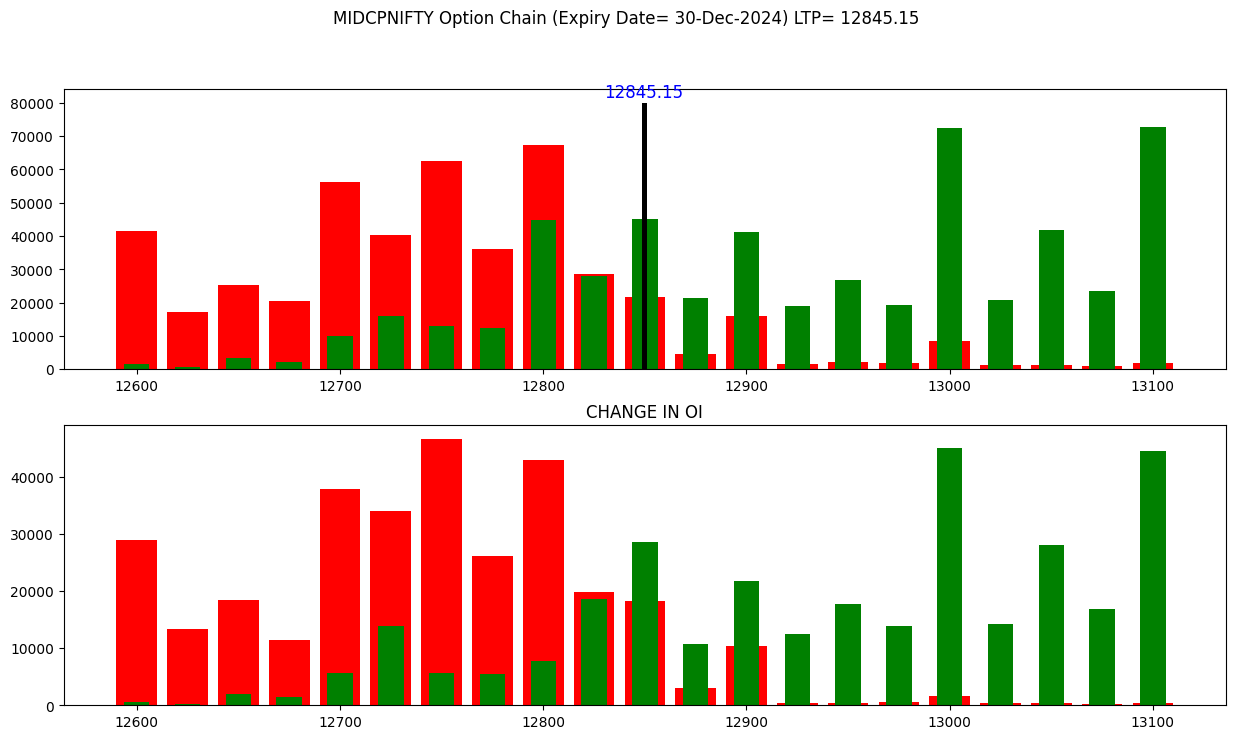

In [ ]:
Print_OI("NIFTY MIDCAP SELECT",10,0)

49963.25
39
50000.0


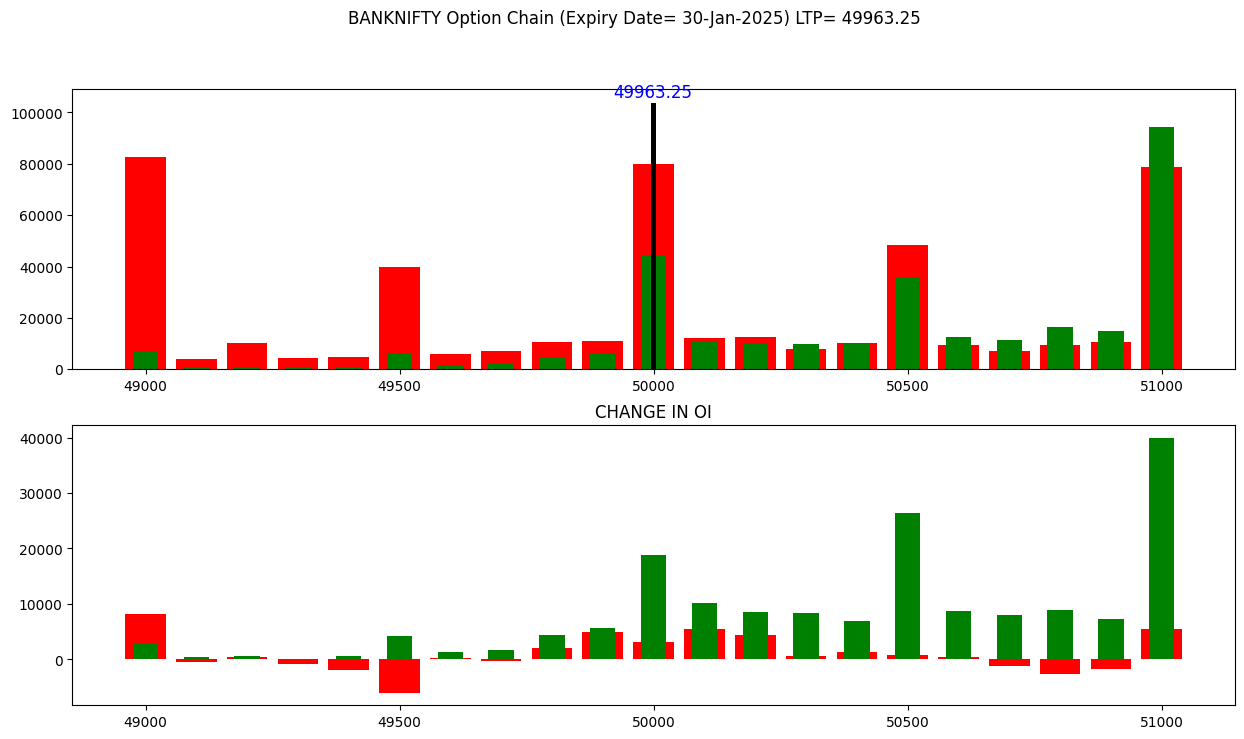

In [2]:
Print_OI("NIFTY BANK",10,0)

23618.8
35
23600.0


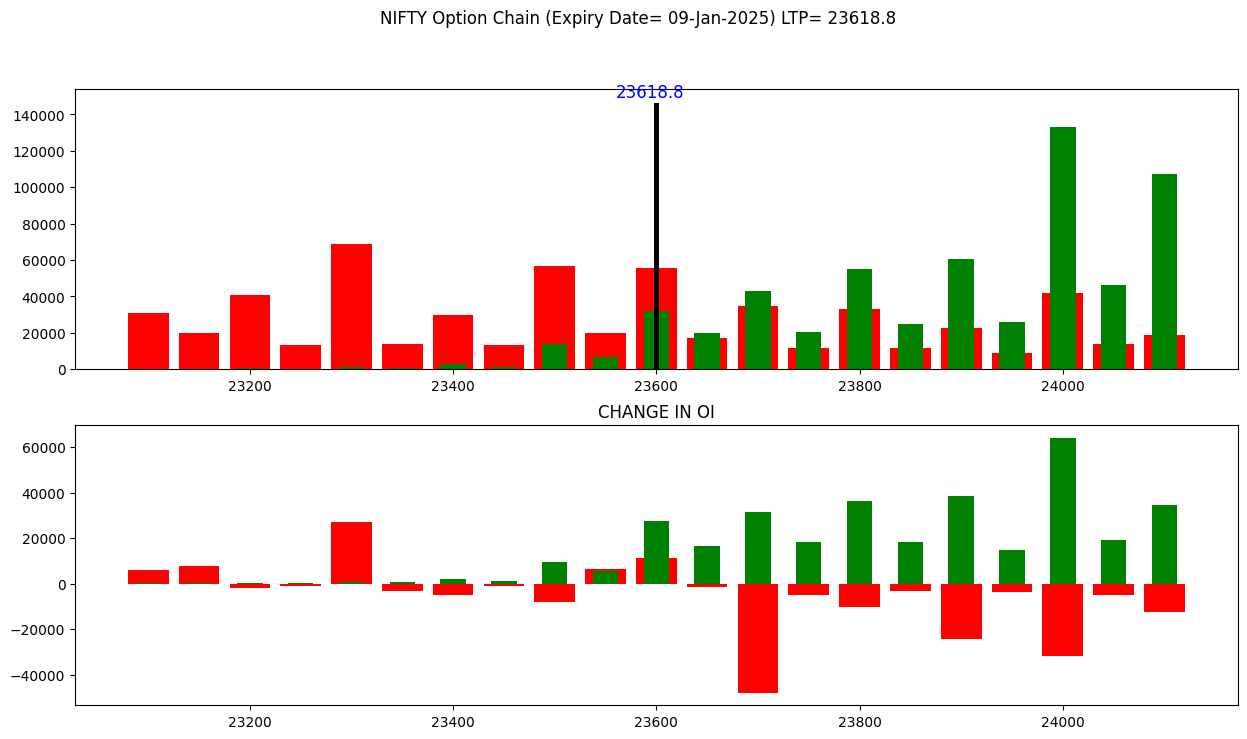

In [3]:
Print_OI("NIFTY 50",10,0)

23523.95
39
23500.0


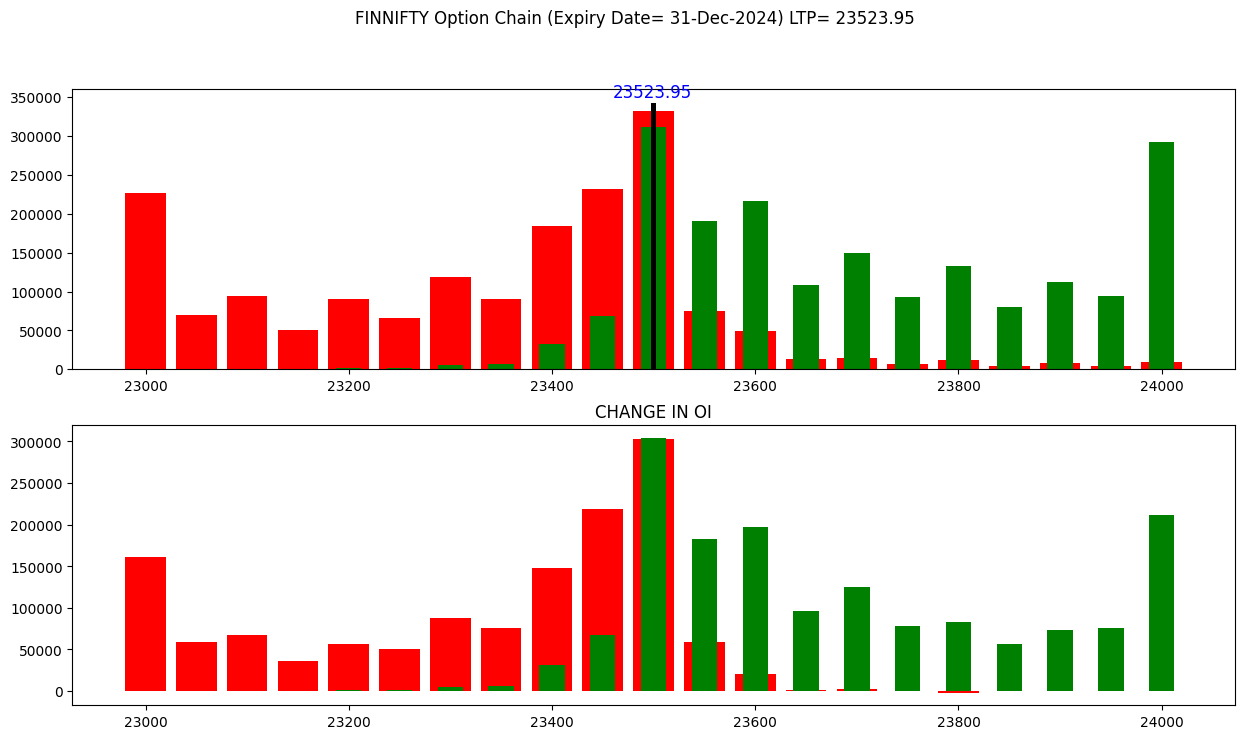

In [ ]:
Print_OI("NIFTY FINANCIAL SERVICES",10,0)

In [ ]:
# prompt: make class to get and print nifty option intrest

import requests
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

class NiftyOptionInterest:
    def __init__(self):
        pass

    def get_ltp(self, index1 ="NIFTY 50"):
        url_indices= "https://www.nseindia.com/api/allIndices"
        headers = {'User-Agent': 'Mozilla/5.0'}
        page = requests.get(url_indices, headers=headers)
        data = json.loads(page.text)
        for index in data["data"]:
            if index["index"]==index1:
                ltp = index["last"]
        return ltp

    def print_oi(self, index = "NIFTY 50", num = 10, Exp = 0):
        ltp = self.get_ltp(index)
        print(ltp)
        ltp1 =str(ltp)
        # ... (rest of the code remains the same)
        # ... (Make sure to indent properly within the class methods)
        # ... (Replace all instances of `get_ltp` with `self.get_ltp`)


# Example usage
nifty_oi = NiftyOptionInterest()
nifty_oi.print_oi("NIFTY MIDCAP SELECT",10,0)
nifty_oi.print_oi("NIFTY BANK",10,0)
nifty_oi.print_oi("NIFTY 50",10,0)
nifty_oi.print_oi("NIFTY FINANCIAL SERVICES",10,0)

In [ ]:
# prompt: create drop down button to select strike price

import requests
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

# ... (rest of your existing code)

strike_price_options = [300,310,320] # Example options - replace with your actual options
selected_strike_price = 320 #@param ["300", "310", "320"] {type:"raw"}

def Print_OI(index = "NIFTY 50",num = 10,Exp = 0):
  # ... (rest of your Print_OI function)

  # Modify the following lines to use the selected strike price
  # ... (your code where you compare strike prices)
  # For example, if you are comparing strike prices in a loop
  for item in data['records']['data']:
    # ... your existing code...
    if item['strikePrice'] == selected_strike_price:
      # process the data for the selected strike price

Print_OI("NIFTY BANK",10,0)
Print_OI("NIFTY 50",10,0)

IndentationError: expected an indented block after 'if' statement on line 25 (<ipython-input-6-f66cd95990f8>, line 28)